## 第3章 Rの導入

### 3.1 Rの基本的な機能

#### 3.1.1 スカラー変数の定義

In [1]:
# ch03_01: 無リスク金利の値を格納する変数Rを作成

R = 0.1  # Rは<-演算子を用いるが，Pythonでは=演算子を用いる
print(R)

## 0.1

0.1


#### 3.1.2 ベクトル変数の定義

In [2]:
# ch03_02: 2次元の無リスク金利ベクトルを作成

R = [0.1, 0.2]

# これ以後，教科書と同様，可読性を重視してprint()関数は挿入しない
## [0.1, 0.2]

In [3]:
# ch03_03: 11次元の無リスク金利ベクトルを作成

# NumPyライブラリの読み込み
import numpy as np  

R = np.linspace(0.1, 0.2, 11)  # NumPyのlinspace()関数を利用した場合

## [0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2 ]

In [4]:
# ch03_04: ベクトルの要素へのアクセス

# 注意：Rのインデックスは'1'から，Pythonは'0'から始まる
# 第2要素（インデックス1）へのアクセス
R[1]
i = 1
R[i]

## 0.11

# 第2-第5要素へのアクセス
R[1:5]  # [i:j]とすることでi <= x < jの範囲が選択される

## [0.11 0.12 0.13 0.14]

# 第2-第11要素へのアクセス
R[1:len(R)]  # len(R)はRの次元11を返す
R[1:]  # 第2要素以降の全ての要素へアクセス

## [0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2 ]

array([0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])

In [5]:
# ch03_05: 1年後の確実な100万円の現在価値

PV = 100 / (1 + R)

## [90.90909091 90.09009009 89.28571429 88.49557522 87.71929825 
## 86.95652174 86.20689655 85.47008547 84.74576271 84.03361345 83.33333333]

In [6]:
# ch03_06: 次元が一致するベクトル同士の割り算

# CFを11次元の等差数列として定義
CF = np.linspace(110, 120, 11)  

PV = CF / (1 + R)

##  [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]

#### 3.1.3 基本パッケージによる作図

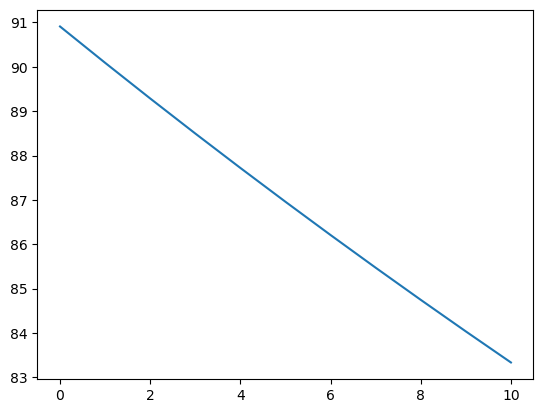

In [7]:
# ch03_07: 割引率と現在価値の関係を描画

# matplotlibライブラリのpyplotモジュールを読み込み
import matplotlib.pyplot as plt  

PV = 100 / (1 + R)
plt.plot(PV)  # plt.plot()関数で折れ線グラフを描画

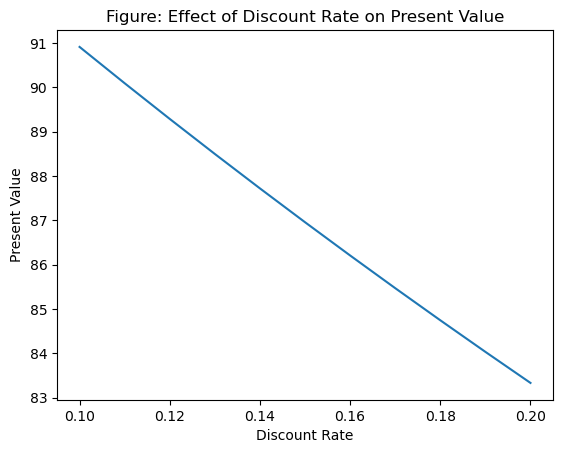

In [8]:
# ch03_08: 割引率と現在価値の関係を表した図の見栄えを改善

PV = 100 / (1 + R)

plt.plot(R, PV)
plt.xlabel('Discount Rate')
plt.ylabel('Present Value')
plt.title('Figure: Effect of Discount Rate on Present Value')
plt.show()  # 描画した図を表示する関数

In [9]:
# ch03_09: 割引率と現在価値の関係を表した図をPNG形式で出力

plt.savefig('PV.png') 

<Figure size 640x480 with 0 Axes>

In [10]:
# ch03_10: 3行2列の行列の作成

# NumPyのarange()関数で1から6までの等差数列を作成後，reshape()メソッドにより形状変換
x = np.arange(1, 7).reshape(3, 2)  

## [[1 2]
## [3 4]
## [5 6]]

In [11]:
# ch03_11: 文字を要素とする行列の作成

y = np.matrix("'a', 'b'; 'c', 'd'")

## [['a' 'b']
## ['c' 'd']]

In [12]:
# ch03_12: リストの作成

# 二つの要素を持つリストxを定義
x = [[10, 11], ['ABC']]  

x[0]  # リストxの一つ目の要素を表示
## [10, 11]

x[1]  # リストxの二つ目の要素を表示
## ['ABC']

['ABC']

In [13]:
# ch03_13: データフレームの作成

# pandasライブラリの読み込み
import pandas as pd  

ID = [1001, 1002, 1003]
name = ["Firm A", "Firm B", "Firm C"]
ROE = [0.08, 0.12, 0.15]

x = pd.DataFrame({'ID': ID, 'name': name, 'ROE': ROE})
##      ID    name   ROE
## 0  1001  Firm A  0.08
## 1  1002  Firm B  0.12
## 2  1003  Firm C  0.15

### 3.2 for文の使い方

#### 3.2.1 NPVの計算例

In [14]:
# ch03_14: 割引率を0.1とする場合のプロジェクトXのNPVの計算

R = 0.1
NPV = -100 + 50 / (1 + R) + 50 / (1 + R) ** 2 + 50 / (1 + R) ** 3  # Pythonでは冪乗を計算するのに**演算子を使う

## 24.3425995492111

#### 3.2.2 for文を用いたNPVの計算

In [15]:
# ch03_15: for文を用いたプロジェクトXのNPVの計算 (1)

R = 0.1
NPV = -100
for i in range(1, 4):  # range()は指定した範囲の整数の要素を生成（ただし，終点4は含まれないので注意）
  NPV = NPV + 50 / (1 + R) ** i 
print(NPV)

24.3425995492111


In [16]:
# ch03_16: for文を用いたプロジェクトXのNPVの計算 (2)

R = 0.1 
NPV = -100
for i in range(1, 4):
  print(NPV)  # ここにprint()関数を挿入
  NPV = NPV + 50 / (1 + R) ** i
print(NPV)

-100
-54.54545454545455
-13.223140495867774
24.3425995492111


In [17]:
# ch03_17: NPVに基づく投資判断

if NPV >= 0:
   print('プロジェクトを実行！')

プロジェクトを実行！


#### 3.2.3 NPVと割引率の関係の可視化

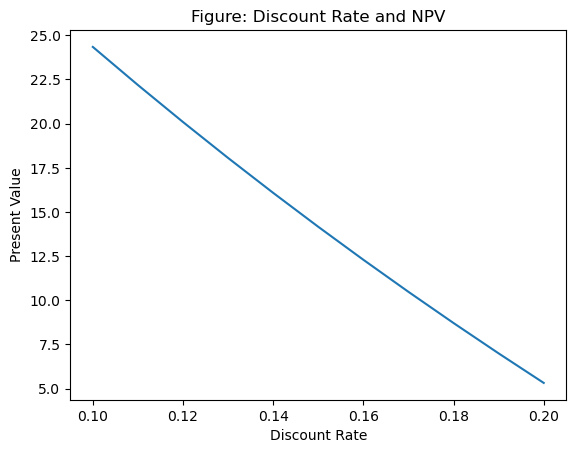

In [18]:
# ch03_18: 異なる割引率に対してプロジェクトXのNPVを計算した上で折れ線グラフに可視化

R = np.linspace(0.1, 0.2, 11)  # 11次元のRベクトルを用意
NPV = np.full_like(R, np.nan, dtype=float)  # Rベクトルと同次元の配列を作成し，全ての要素をNaN (Not a Number)で初期化

for i in range(len(R)):  # 外側のfor文で特定の割引率を固定．開始値が0の場合はrange(0, len(R))とする必要無し
    NPV[i] = -100
    for j in range(1, 4):  # 内側のfor文で各年度の将来キャッシュフローの現在価値を累積
        NPV[i] = NPV[i] + 50 / (1 + R[i]) ** j  # 累算代入演算子+=を使う場合は，NPV[i] += 50 / (1 + R[i]) ** j
      
plt.plot(R, NPV)
plt.xlabel('Discount Rate')
plt.ylabel('Present Value')
plt.title('Figure: Discount Rate and NPV')
plt.show()

In [19]:
# ch03_19: ベクトル化によるNPVの計算

R = 0.1
CF = np.array([-100, 50, 50, 50])  # 各年限のCFに応じた四つの要素を持つ配列をCFとして定義
years = np.arange(4)
PV_CF = CF / (1 + R) ** years
NPV = np.sum(PV_CF)  # NumPyのsum()関数で配列の各要素の合計を計算

## 24.3425995492111

### 3.3 独自関数の定義の仕方

#### 3.3.1 現在価値を計算する独自関数の定義

In [20]:
# ch03_20: 任意の割引率に対して1年後に受け取る100万円の現在価値を計算する独自関数

def calculate_PV(R):  # 独自関数はdefキーワードを使って定義
  PV = 100 / (1 + R)
  return PV  # returnキーワードで戻り値を指定

calculate_PV(0.1)

## 90.9090909090909

90.9090909090909

**コードch03_21は，R言語特有のものであるため割愛**

#### 3.3.2 現在価値を計算する関数の機能拡張

In [21]:
# ch03_22: 二つの割引率に対して現在価値を計算できるようcalculate_PV()を拡張

def calculate_PV(R1, R2=0):
  PV1 = 100 / (1 + R1)
  PV2 = 100 / (1 + R2)
  return [PV1, PV2]
  
calculate_PV(0.1, 0.2)

## [90.9090909090909, 83.33333333333334]

calculate_PV(0.1)

## [90.9090909090909, 100.0]

[90.9090909090909, 100.0]

In [22]:
# ch03_23: 任意の割引率とキャッシュフローに対して現在価値を計算できるようcalculate_PV()を拡張

def calculate_PV(R, CF):
    N = len(CF)  # キャッシュフローの発生する回数をNとして定義
    PV = CF[0]
    for i in range(1, N):
        PV = PV + CF[i] / (1 + R) ** i
    return PV

calculate_PV(0.1, [-100, 40, 50, 60])

## 22.764838467317787

22.764838467317787

In [23]:
# ch03_24: コメントが詳細で分かりやすいコードの例

# 2021年1月1日作成
# 現在価値の計算

# 任意の割引率に対して現在価値を計算するcalculate_PV()を定義
def calculate_PV(R): 
    PV = 100 / (1 + R)
    return PV 

# 割引率を0.1とする例
calculate_PV(0.1)

## 90.9090909090909

90.9090909090909

In [24]:
# ch03_25: 関数内でグローバル変数の変更を試みた例

def calculate_PV(R):
    PV = 100 / (1 + R)
    R = R + 0.01
    return PV

R = 0.01
for i in range(11):
    print(calculate_PV(R))
    
## 99.00990099009901
## 99.00990099009901
## （同じ計算結果が全部で11回繰り返し表示される）

99.00990099009901
99.00990099009901
99.00990099009901
99.00990099009901
99.00990099009901
99.00990099009901
99.00990099009901
99.00990099009901
99.00990099009901
99.00990099009901
99.00990099009901


### 3.4 演習:IRRの計算

#### 3.4.2 多項式の数値解

In [25]:
# ch03_26: poly.polyroots()に基づく3次方程式の数値解

# NumPyのpolynomialモジュールを読み込み
import numpy.polynomial.polynomial as poly  

poly.polyroots([60, 50, 40, -100])  # poly.polyroots()関数は，Rのpolyroot()関数と同様の役割を果たす

## [-0.40823893-0.57146147j -0.40823893+0.57146147j  1.21647785+0.j        ]

array([-0.40823893-0.57146147j, -0.40823893+0.57146147j,
        1.21647785+0.j        ])

In [26]:
# ch03_27: 数値解の中から実数解を目視で選んでIRRを計算

solutions = poly.polyroots([60, 50, 40, -100]) 
Y = solutions[2].real # 求めた解のうち三つ目の解の実数部分を抽出
IRR = Y - 1

## 0.2164778541842911

#### 3.4.3 実数解の抽出

In [27]:
# ch03_28: imagメソッドを用いて虚部のみ抽出

solutions.imag # imagメソッドで各要素の虚部のみ抽出

## [-0.57146147  0.57146147  0.        ]

array([-0.57146147,  0.57146147,  0.        ])

In [28]:
# ch03_29: 等価演算子==を用いて実数解かどうかを判定

solutions.imag == 0

## [False False  True]

array([False, False,  True])

**コードch03_30は，R言語特有のものであるため割愛**

In [29]:
# ch03_31: 数値解の中から実数解を機械的に抽出

np.where(solutions.imag == 0)  # NumPyのwhere()関数で条件を満たすインデックスを取得
solutions.real[np.where(solutions.imag == 0)]  # realメソッドを使って虚部がゼロの要素の実数部分を抽出

## [1.21647785]

array([1.21647785])

#### 3.4.4 IRRを計算する独自関数の定義

In [30]:
# ch03_32: 任意のCFに対してIRRを計算するcalculate_IRR()関数を定義

def calculate_IRR(CF):
    reversed_CF = list(reversed(CF)) # CFベクトルの順序を逆転させ，reversed_CFとして定義
    solutions = poly.polyroots(reversed_CF) # reversed_CFをpoly.polyroots()関数に代入
    return solutions.real[np.where(solutions.imag == 0)] - 1

In [31]:
# ch03_33: calculate_IRR()関数の実行例

CF = [-100, 40, 50, 60]
calculate_IRR(CF)

## [0.21647785]

array([0.21647785])

In [32]:
# ch03_34: calculate_IRR()関数の完成版（エラーメッセージ付き）

def calculate_IRR(CF):
    reversed_CF = list(reversed(CF))  
    solutions = poly.polyroots(reversed_CF)
    if np.count_nonzero(solutions.imag == 0) != 1:  # 実数解（虚部がゼロ）が一つでなければ
       print('IRR法の適用を再考！')  # IRR法の適用を再考！と出力
    else:  # そうでなければ（実数解が一つならば）
       return solutions.real[np.where(solutions.imag == 0)] - 1 # IRRを出力

In [33]:
# ch03_35: エラーメッセージが表示される例

CF = [-100, 100, 120, -120]
result = calculate_IRR(CF)
result

IRR法の適用を再考！


### 3.5 データフレーム入門

#### 3.5.1 CSVファイルの読み込み

In [34]:
# ch03_36: CSVファイルの読み込み

# pandasのread_csv()関数を用いてCSVファイルの読み込み
daily_stock_return = pd.read_csv('ch03_daily_stock_return.csv')

In [35]:
# ch03_37: データフレームの冒頭を確認

daily_stock_return.head()

,date,firm1,firm2
0,2020-04-01,-0.039482,0.076963
1,2020-04-02,0.005979,-0.007249
2,2020-04-03,0.055787,-0.017304
3,2020-04-06,0.041935,0.002169
4,2020-04-07,-0.020193,0.075545


In [36]:
# ch03_38: データフレームの行数を確認

len(daily_stock_return)

## 21

21

In [37]:
# ch03_39: データフレームの内部構造を確認

daily_stock_return.info()

## <class 'pandas.core.frame.DataFrame'>
## RangeIndex: 21 entries, 0 to 20
## Data columns (total 3 columns):
##  #   Column  Non-Null Count  Dtype  
## ---  ------  --------------  -----  
##  0   date    21 non-null     object 
##  1   firm1   21 non-null     float64
##  2   firm2   21 non-null     float64
## dtypes: float64(2), object(1)
## memory usage: 632.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    21 non-null     object 
 1   firm1   21 non-null     float64
 2   firm2   21 non-null     float64
dtypes: float64(2), object(1)
memory usage: 636.0+ bytes


In [38]:
# ch03_40: 日次リターンの平均値を計算

daily_stock_return['firm1'].mean()

## 0.014161168900422329

daily_stock_return['firm2'].mean()

## 0.008025261018862447

0.008025261018862447

In [39]:
# ch03_41: 日次リターンの標準偏差と相関を計算

daily_stock_return['firm1'].std()  # stdはstandard deviation（標準偏差）の略

## 0.05383960148069729

daily_stock_return['firm1'].corr(daily_stock_return['firm2'])

## 0.23348923734986948

0.23348923734986948

In [40]:
# ch03_42: 最も日次リターンが低い日付を抽出

worst_day_ID = daily_stock_return['firm1'].idxmin()  # idxmin()メソッドで最小のインデックス（行番号）を取得

## 20

# 取得したインデックスをlocメソッドを使って代入して日付を取得
# loc[行名（インデックス）, 列名]で要素の抽出が可能
daily_stock_return.loc[worst_day_ID, 'date'] 

## '2020-04-28'

'2020-04-28'

In [41]:
# ch03_43: 日次リターンがプラスである日付のみを抽出

daily_stock_return.loc[daily_stock_return['firm1'] > 0, 'date']  # 企業1のみで条件付け

## 1     2020-04-02
## 2     2020-04-03
## 3     2020-04-06
## 6     2020-04-09
## 7     2020-04-10
## 8     2020-04-13
## 10    2020-04-15
## 12    2020-04-17
## 13    2020-04-20
## 15    2020-04-22
## 18    2020-04-27
## 20    2020-04-30
## Name: date, dtype: object

daily_stock_return.loc[(daily_stock_return['firm1'] > 0) & (daily_stock_return['firm2'] > 0), 'date']

## 3     2020-04-06
## 6     2020-04-09
## 7     2020-04-10
## 8     2020-04-13
## 10    2020-04-15
## 12    2020-04-17
## 13    2020-04-20
## Name: date, dtype: object

3     2020-04-06
6     2020-04-09
7     2020-04-10
8     2020-04-13
10    2020-04-15
12    2020-04-17
13    2020-04-20
Name: date, dtype: object

In [42]:
# ch03_44: データフレームにおける列の作成・書き換え・削除

daily_stock_return['difference'] = daily_stock_return['firm1'] - daily_stock_return['firm2']  # 両銘柄の差分を計算して新しい列に保存
daily_stock_return['firm1'] = 1 + daily_stock_return['firm1']  # 企業1のネットリターンをグロスリターンに変換
daily_stock_return = daily_stock_return.drop('firm2', axis=1)  # 企業2のデータを削除
# 単にdaily_stock_return.drop('firm2', axis=1, inplace=True)としても同様

daily_stock_return.head()

,date,firm1,difference
0,2020-04-01,0.960518,-0.116445
1,2020-04-02,1.005979,0.013228
2,2020-04-03,1.055787,0.073091
3,2020-04-06,1.041935,0.039766
4,2020-04-07,0.979807,-0.095738


In [43]:
# ch03_45: データフレームをCSVファイルに出力

daily_stock_return.to_csv('ch03_output.csv', index=False)

### 3.6 ファクター型と日付型

#### 3.6.1 ファクター型入門

In [44]:
# ch03_46: industry列を文字型として定義

firm_ID = [1, 2, 3]
name = ["Firm A", "Firm B", "Firm C"]
industry = ["Machinery", "Chemicals", "Machinery"]

firm_data = pd.DataFrame({"firm_ID": firm_ID, "name": name, "industry": industry})
print(firm_data.dtypes)

## firm_ID      int64
## name        object
## industry    object
## dtype: object

firm_ID      int64
name        object
industry    object
dtype: object


In [45]:
# ch03_47: industry列をカテゴリ型に変換

firm_data['industry'] = firm_data['industry'].astype('category')  # Rのファクター型に相当するのはPythonのカテゴリ型
print(firm_data.dtypes)

## firm_ID        int64
## name          object
## industry    category
## dtype: object

firm_ID        int64
name          object
industry    category
dtype: object


#### 3.6.2 日付型入門

In [46]:
# ch03_48: date列を文字型として定義

date = ["2021/4/1", "2021/4/2", "2021/4/5"]
stock_return = [0.02, -0.01, -0.02]

stock_return_data = pd.DataFrame({"date": date, "stock_return": stock_return})
print(stock_return_data.dtypes)

## date             object
## stock_return    float64
## dtype: object

date             object
stock_return    float64
dtype: object


In [47]:
# ch03_49: date列を日時型に変換

stock_return_data['date'] = pd.to_datetime(stock_return_data['date'])  # 日付だけではなく時間情報も含む日時型へと変換
print(stock_return_data.dtypes)

## date            datetime64[ns]
## stock_return           float64
## dtype: object

date            datetime64[ns]
stock_return           float64
dtype: object


In [48]:
# ch03_50: 日時型の変数に対する足し算の例

from datetime import datetime, timedelta
stock_return_data['date'] = stock_return_data['date'] + timedelta(days=1)
stock_return_data.head()

##         date  stock_return
## 0 2021-04-02          0.02
## 1 2021-04-03         -0.01
## 2 2021-04-06         -0.02

,date,stock_return
0,2021-04-02,0.02
1,2021-04-03,-0.01
2,2021-04-06,-0.02


### 3.7 外部パッケージの使い方

#### 3.7.2 作図データの準備

**ch03_50-ch03_53は，Rのtidyverseパッケージの導入に関するコードのため割愛**

In [49]:
# ch03_54: 異なる初期投資額に対して内部収益率をそれぞれ計算

# NumPyのバージョンによって警告が発せられるDeprecationWarningを非表示に
import warnings
warnings.filterwarnings("ignore")

initial_cost = np.linspace(80, 100, 21)  # 21次元のinitial_costベクトルを用意
IRR = np.full_like(initial_cost, np.nan, dtype=float)  # initial_costと同次元の配列を作成し，全ての要素をNaNで初期化

for i in range(len(initial_cost)): 
    IRR[i] = calculate_IRR([-initial_cost[i], 100]) # 各initial_costに対応するIRRを計算

figure_data = pd.DataFrame({'initial_cost': initial_cost, 'IRR': IRR}) # 計算結果をデータフレームfigure_dataに格納

In [50]:
#### 3.7.3 matplotlibによる作図

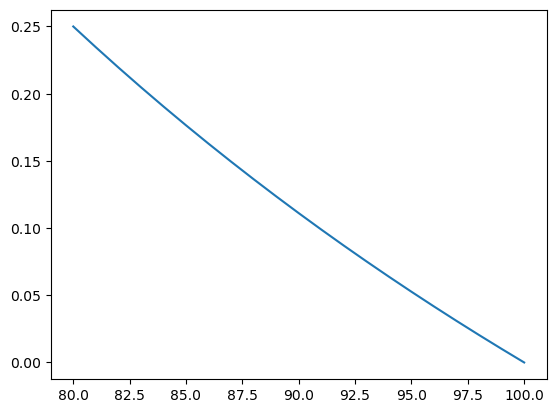

In [51]:
# ch03_55: 初期投資額と内部収益率の関係を描画

plt.plot(initial_cost, IRR)
plt.show()

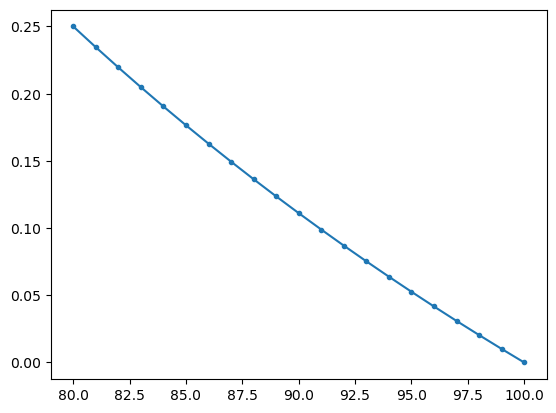

In [52]:
# ch03_56: 折れ線グラフの上に点グラフを追加

plt.plot(initial_cost, IRR, marker='.')
plt.show()

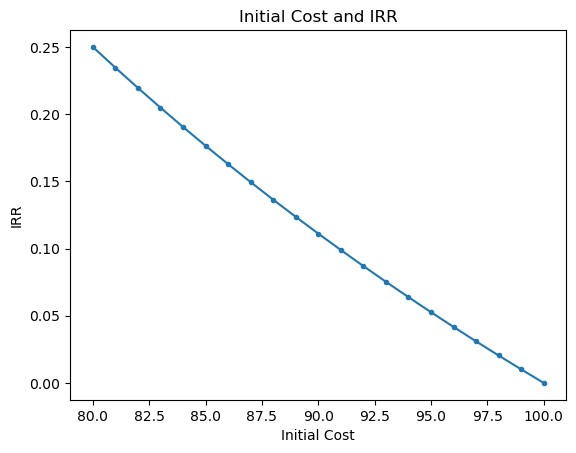

In [53]:
# ch03_57: 図の見栄えを改善

plt.plot(initial_cost, IRR, marker='.')
plt.xlabel('Initial Cost')
plt.ylabel('IRR')
plt.title('Initial Cost and IRR')
plt.show()

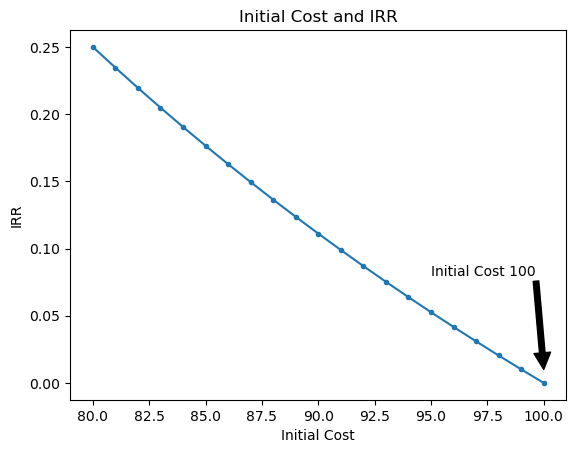

<Figure size 640x480 with 0 Axes>

In [54]:
# ch03_58: 初期投資額が100の点を強調

plt.plot(initial_cost, IRR, marker='.')
plt.xlabel('Initial Cost')
plt.ylabel('IRR')
plt.title('Initial Cost and IRR')
plt.annotate('Initial Cost 100', xy=(100, 0.01), xytext=(95, 0.08),
             arrowprops = dict(facecolor = 'black'))
plt.show()
plt.savefig("IRR.pdf")

In [55]:
# 以上のコードについて，動作確認をした実行環境の表示
# 本セルは，実行環境の確認のためであり，無視してもらっても構わない
import session_info
session_info.show(dependencies=False)